In [1]:
import pandas as pd  # Для работы с табличными данными
from sklearn.model_selection import train_test_split  # Для разбиения данных на тренировочную и тестовую выборки
from sklearn.naive_bayes import MultinomialNB  # Для построения модели наивного байесовского классификатора
import matplotlib.pyplot as plt  # Для визуализации
import seaborn as sns  # Для более наглядной визуализации

In [2]:
# Читаем данные из CSV-файла без заголовков
data = pd.read_csv('spambase.data', header=None)

# Переименовываем колонку 57 в "is_spam" — это наш целевой признак (1 = спам, 0 = не спам)
data.rename(columns={57: 'is_spam'}, inplace=True)

In [3]:
# Разделяем данные на спам (is_spam == 1) и не спам (is_spam == 0)
spam = data[data['is_spam'] == 1]  # Данные, содержащие спам
ham = data[data['is_spam'] == 0]  # Данные, не содержащие спам

# Разбиваем данные на тренировочные и тестовые выборки отдельно для спама и не спама
spam_train, spam_test = train_test_split(spam, train_size=0.6, random_state=42)  # 60% спама в тренировочную выборку
ham_train, ham_test = train_test_split(ham, train_size=0.6, random_state=42)  # 60% не спама в тренировочную выборку

In [4]:
# Объединяем тренировочные выборки спама и не спама
X_train = pd.concat([ham_train, spam_train], ignore_index=True)

# Извлекаем метки классов ('is_spam') и оставляем только признаки
y_train = X_train.pop('is_spam')

In [5]:
# Объединяем тестовые выборки спама и не спама
X_test = pd.concat([ham_test, spam_test], ignore_index=True)

# Извлекаем метки классов из тестовой выборки
y_test = X_test.pop('is_spam')

In [7]:
# Обучаем наивный байесовский классификатор
spam_bayes = MultinomialNB()
spam_bayes.fit(X_train, y_train)  # Обучение модели

# Оцениваем точность модели на тестовых данных
test_accuracy = spam_bayes.score(X_test, y_test)  # Точность на тестовой выборке
train_accuracy = spam_bayes.score(X_train, y_train)  # Точность на тренировочной выборке

# Выводим точности
print(f"Точность на тестовой выборке: {test_accuracy * 100:.2f}%")
print(f"Точность на тренировочной выборке: {train_accuracy * 100:.2f}%")

Точность на тестовой выборке: 79.59%
Точность на тренировочной выборке: 79.12%


<ipython-input-8-209b45614feb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['is_spam'], palette='Set2')


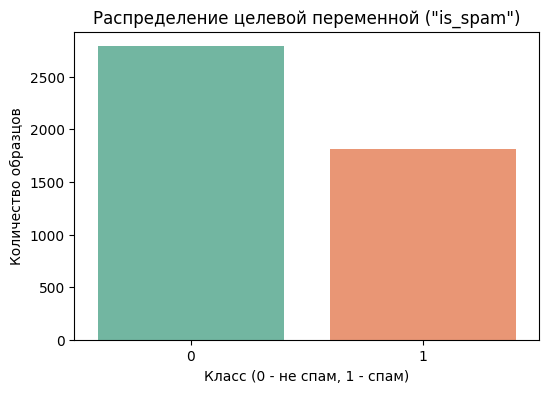

<ipython-input-8-209b45614feb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_accuracy, test_accuracy], palette='Set2')


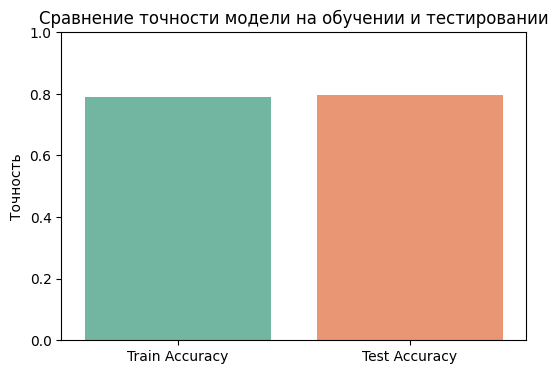

In [8]:
# Визуализация сбалансированности классов в целевой выборке
plt.figure(figsize=(6, 4))
sns.countplot(x=data['is_spam'], palette='Set2')
plt.title('Распределение целевой переменной ("is_spam")')
plt.xlabel('Класс (0 - не спам, 1 - спам)')
plt.ylabel('Количество образцов')
plt.show()

# Визуализация точности модели
plt.figure(figsize=(6, 4))
sns.barplot(x=['Train Accuracy', 'Test Accuracy'], y=[train_accuracy, test_accuracy], palette='Set2')
plt.title('Сравнение точности модели на обучении и тестировании')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.show()